In [11]:
import pandas as pd
df = pd.read_excel("C:/Users/전산실29/Desktop/스프레드/survey.xlsx")
df.head(3)

,사원번호,직무,성별,만족도,연봉
0,1,회계,남,3,51
1,2,총무,남,3,38
2,3,기타,남,3,51


In [13]:
df['연봉집단'] = pd.cut(df['연봉'],labels=('최저','저','중','고','최고'),bins=5)
df.head()

,사원번호,직무,성별,만족도,연봉,연봉집단
0,1,회계,남,3,51,고
1,2,총무,남,3,38,저
2,3,기타,남,3,51,고
3,4,회계,남,2,52,고
4,5,마케팅,남,3,49,중


In [14]:
table = pd.crosstab(index=df['연봉집단'],columns='인원')
table

col_0,인원
연봉집단,
최저,5
저,42
중,118
고,68
최고,20


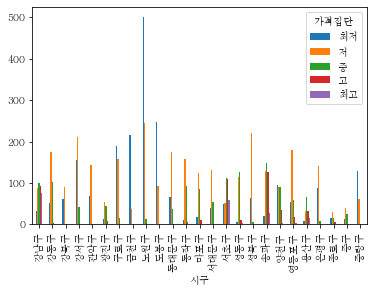

In [20]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"]='batang'
import pandas as pd

df1 = pd.read_excel("C:/Users/전산실29/Desktop/스프레드/apt_price.xlsx")
df1['시군구'] = df1['시군구'].astype(str)
temp = df1['시군구'].str.split(n=2,expand=True)
temp.columns=['도','시구','동']
df1.drop('시군구',axis=1,inplace=True)
data = pd.concat([df1,temp],axis=1)
data['거래금액']=data['거래금액'].apply(lambda x :x.replace(",",""))
data['거래금액']=data['거래금액'].astype(float)
seoul = data.query("도=='서울특별시' & 3000<=거래금액<=300000")
seoul_temp = seoul.copy()
group=['최저','저','중','고','최고']
seoul_temp['가격집단'] = pd.cut(seoul_temp['거래금액'],bins=5,labels=group)
table = pd.crosstab(index=seoul_temp['시구'],columns=seoul_temp['가격집단'])
table.plot(kind='bar')